# Xarray

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atsuyaourt/gis-python-tutorial/blob/main/book/08_xarray.ipynb)

## What is Xarray?

Xarray extends the capabilities of NumPy by providing a data structure for labeled, multi-dimensional arrays. The two main data structures in Xarray are:

- **DataArray**: A labeled, multi-dimensional array, which includes dimensions, coordinates, and attributes.
- **Dataset**: A collection of `DataArray` objects that share the same dimensions.

![](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

Xarray is particularly useful for working with datasets where dimensions have meaningful labels (e.g., time, latitude, longitude) and where metadata is important.

## Installing Xarray

Before we start, ensure that Xarray is installed. You can install it via pip:

In [ ]:
# %pip install xarray pooch

## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

## Xarray Data Structures

Xarray provides two core data structures:

1. **DataArray**: A single multi-dimensional array with labeled dimensions, coordinates, and metadata.
2. **Dataset**: A collection of `DataArray` objects, each corresponding to a variable, sharing the same dimensions and coordinates.

### Loading an example Dataset

Xarray offers built-in access to several [tutorial datasets](https://docs.xarray.dev/en/latest/generated/xarray.tutorial.open_dataset.html), which we can load with `xr.tutorial.open_dataset`. Here, we load an air temperature dataset:

In [ ]:
ds = xr.tutorial.open_dataset("air_temperature")
ds

We can access "layers" of the Dataset (individual DataArrays) with dictionary syntax

In [ ]:
temperature = ds["air"]
temperature

We can also use the dot notation:

In [ ]:
ds.air

## DataArray Components

- **Values**: The actual data stored in a NumPy array or similar structure.
- **Dimensions**: Named axes of the data (e.g., time, latitude, longitude).
- **Coordinates**: Labels for the values in each dimension (e.g., specific times or geographic locations).
- **Attributes**: Metadata associated with the data (e.g., units, descriptions).

You can extract and print the values, dimensions, and coordinates of a `DataArray`:

In [ ]:
temperature.values

In [ ]:
temperature.dims

In [ ]:
temperature.coords

In [ ]:
temperature.attrs

## Indexing and Selecting Data

Xarray allows you to easily select data based on dimension labels, which is very intuitive when working with geospatial data.

In [7]:
# Select data for a specific time and location
selected_data = temperature.sel(time="2013-01-01", lat=40.0, lon=260.0)
selected_data

<xarray.DataArray 'air' (time: 4)> Size: 32B
array([265.2, 266.2, 262.4, 267.5])
Coordinates:
    lat      float32 4B 40.0
    lon      float32 4B 260.0
  * time     (time) datetime64[ns] 32B 2013-01-01 ... 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [8]:
# Slice data across a range of times
time_slice = temperature.sel(time=slice("2013-01-01", "2013-01-31"))
time_slice

<xarray.DataArray 'air' (time: 124, lat: 25, lon: 53)> Size: 1MB
array([[[241.2 , 242.5 , ..., 235.5 , 238.6 ],
        [243.8 , 244.5 , ..., 235.3 , 239.3 ],
        ...,
        [295.9 , 296.2 , ..., 295.9 , 295.2 ],
        [296.29, 296.79, ..., 296.79, 296.6 ]],

       [[242.1 , 242.7 , ..., 233.6 , 235.8 ],
        [243.6 , 244.1 , ..., 232.5 , 235.7 ],
        ...,
        [296.2 , 296.7 , ..., 295.5 , 295.1 ],
        [296.29, 297.2 , ..., 296.4 , 296.6 ]],

       ...,

       [[238.  , 237.7 , ..., 240.89, 242.3 ],
        [238.1 , 237.1 , ..., 236.5 , 239.  ],
        ...,
        [296.6 , 296.9 , ..., 296.1 , 295.9 ],
        [297.5 , 297.4 , ..., 296.79, 296.7 ]],

       [[238.1 , 238.39, ..., 240.2 , 241.3 ],
        [240.3 , 239.7 , ..., 236.3 , 238.39],
        ...,
        [296.29, 296.6 , ..., 296.5 , 295.9 ],
        [297.4 , 297.4 , ..., 297.2 , 296.79]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-01-01 ... 2013-01-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Performing Operations on DataArrays

You can perform arithmetic operations directly on `DataArray` objects, similar to how you would with NumPy arrays. Xarray also handles broadcasting automatically.

In [9]:
# Calculate the mean temperature over time
mean_temperature = temperature.mean(dim="time")
mean_temperature

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
260.4 260.2 259.9 259.5 259.0 258.6 ... 298.0 297.9 297.8 297.3 297.3 297.3
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [10]:
# Subtract the mean temperature from the original data
anomalies = temperature - mean_temperature
anomalies

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
-19.18 -17.68 -16.39 -15.48 -14.92 ... -0.5012 -0.6276 -0.8482 -1.091 -1.615
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Visualization with Xarray

Xarray integrates well with Matplotlib and other visualization libraries, making it easy to create plots directly from `DataArray` and `Dataset` objects.

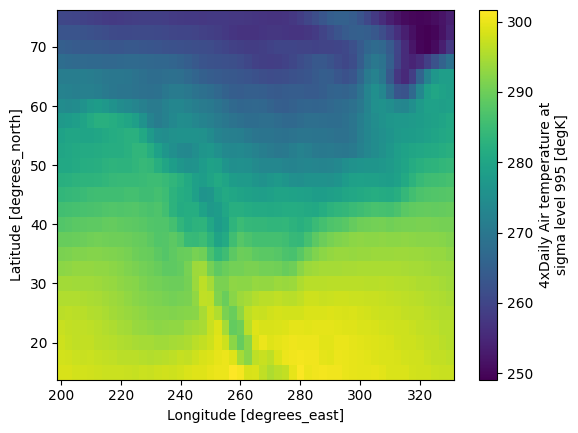

In [11]:
# Plot the mean temperature
mean_temperature.plot()
plt.show()

You can customize the appearance of plots by passing arguments to the `plot` method. For example, you can specify the color map, add labels, and set the figure size.

Text(0.5, 1.0, 'Mean Temperature')

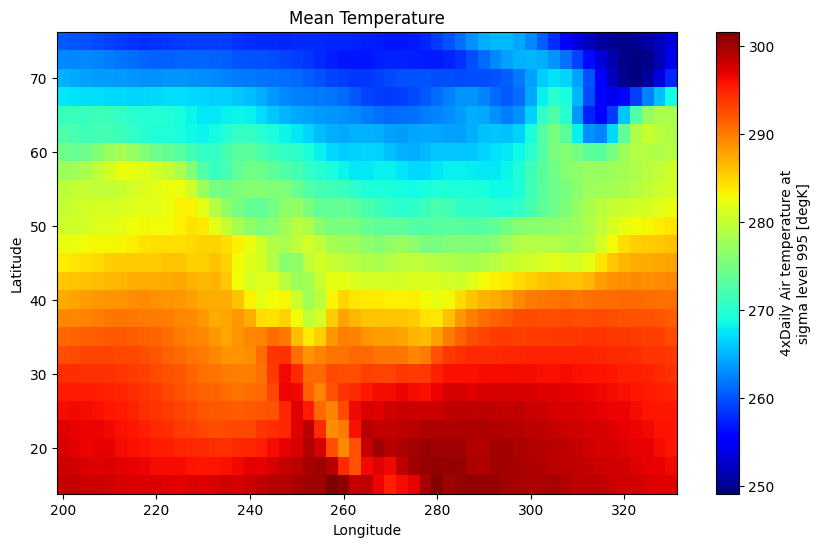

In [12]:
mean_temperature.plot(cmap="jet", figsize=(10, 6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mean Temperature")

You can also select a specific location using the `sel` method and plot a time series of temperature at that location.

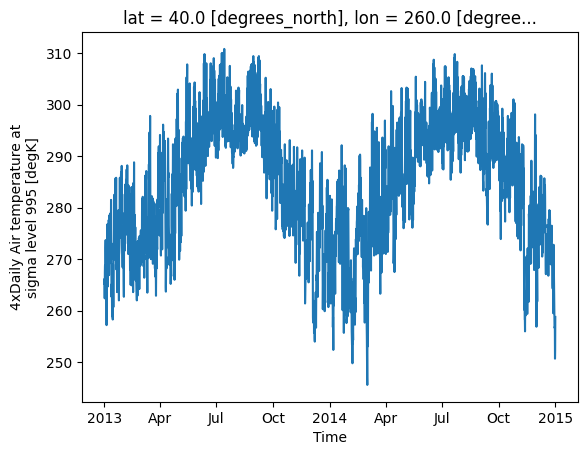

In [13]:
# Plot a time series for a specific location
temperature.sel(lat=40.0, lon=260.0).plot()
plt.show()

## Why Use Xarray?

Xarray is valuable for handling multi-dimensional data, especially in scientific applications. It provides metadata, dimension names, and coordinate labels, making it much easier to understand and manipulate data compared to raw NumPy arrays.

### Without Xarray (Using NumPy)

Here's how a task might look without Xarray, using NumPy arrays:

In [ ]:
lat = ds.air.lat.data
lon = ds.air.lon.data
temp = ds.air.data

In [ ]:
temp.shape

In [ ]:
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :])

While this approach works, it's not clear what `0` refers to (in this case, it's the first time step).

### With Xarray

With Xarray, you can use more intuitive and readable indexing with `sel` and `isel`:

In [ ]:
ds.air.isel(time=0).plot(x="lon")

In [ ]:
ds.air.sel(time="2013-01-01T00:00:00").plot(x="lon")

This example selects the first time step and plots it using labeled axes (`lat` and `lon`), which is much clearer.



## Advanced Indexing: Label vs. Position-Based Indexing

Xarray supports both label-based and position-based indexing, making it flexible for data selection.

### Label-based Indexing

You can use `.sel()` to select data based on the labels of coordinates, such as specific times or locations:

In [ ]:
# Select all data from May 2013
ds.sel(time="2013-05")

In [ ]:
# Slice over time, selecting data between May and July 2013
ds.sel(time=slice("2013-05", "2013-07"))

### Position-based Indexing

Alternatively, you can use `.isel()` to select data based on the positions of coordinates:

In [ ]:
# Select the first time step, second latitude, and third longitude
ds.air.isel(time=0, lat=2, lon=3)

## Reading and Writing Files

Xarray supports many common scientific data formats, including [netCDF](https://www.unidata.ucar.edu/software/netcdf/) and [Zarr](https://zarr.readthedocs.io/). You can read and write datasets to disk with a few simple commands.

### Writing to netCDF

To save a dataset as a netCDF file:

In [ ]:
# Ensure air is in a floating-point format (float32 or float64)
ds["air"] = ds["air"].astype("float32")

# Save the dataset to a NetCDF file
ds.to_netcdf("air_temperature.nc")

### Reading from netCDF

To load a dataset from a netCDF file:

In [ ]:
loaded_data = xr.open_dataset("air_temperature.nc")
loaded_data

## Exercises

### Exercise 1: Exploring a New Dataset

1. Load the Xarray tutorial dataset `rasm`.
2. Inspect the `Dataset` object and list all the variables and dimensions.
3. Select the `Tair` variable (air temperature).
4. Print the attributes, dimensions, and coordinates of `Tair`.

### Exercise 2: Data Selection and Indexing

1. Select a subset of the `Tair` data for the date `1980-07-01` and latitude `70.0`.
2. Create a time slice for the entire latitude range between January and March of 1980.
3. Plot the selected time slice as a line plot.

### Exercise 3: Performing Arithmetic Operations

1. Compute the mean of the `Tair` data over the `time` dimension.
2. Subtract the computed mean from the original `Tair` dataset to get the temperature anomalies.
3. Plot the mean temperature and the anomalies on separate plots.

### Exercise 4: GroupBy and Resampling

1. Use `groupby` to calculate the seasonal mean temperature (`Tair`).
2. Use `resample` to calculate the monthly mean temperature for 1980.
3. Plot the seasonal mean for each season and the monthly mean.

### Exercise 5: Writing Data to netCDF

1. Select the temperature anomalies calculated in Exercise 3.
2. Convert the `Tair` variable to `float32` to optimize file size.
3. Write the anomalies data to a new netCDF file named `tair_anomalies.nc`.
4. Load the data back from the file and print its contents.